Dahlin, Patrick: Grade=95/100
1.) No figure caption in exercise 3

Exercise 1:

In [1]:
import numpy as np
y = np.array([[1,2,3,5], [7,8,9,5], [9,5,4,11],[2,6,7,9]])
x = np.array([[1,2,6,5], [7,8,2,5], [9,5,4,11],[2,2,7,6]])
print np.dot(y,x)

element11 = 1*1 + 2*7 + 3*9 + 5*2
element12 = 1*2 + 2*8 + 3*5 + 5*2
print element11, element12

[[ 52  43  57  78]
 [154 133 129 204]
 [102 100 157 180]
 [125 105 115 171]]
52 43


Exercise 2:

In [5]:
import math
pi = 3.141592653

def fn2(x):
    f = 1.0
    for k in range(1, 100):
        fp = f
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
        if fp == f :
            return k

val = pi/2.
a = fn2(val) 
print fn2(val)

15


Exercise 3:

In [6]:
from numpy import *
from scipy import optimize

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(
                 -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)
 
def moments(data):
    """Returns (height, x, y, width_x, width_y)
   the gaussian parameters of a 2D distribution by calculating its
   moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

Filename: andromeda.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      38   (510, 340)   int16 (rescales to uint16)   


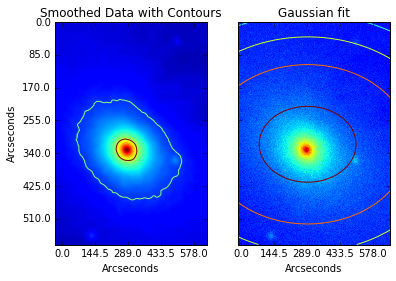

In [7]:
%matplotlib inline
from astropy.io import fits
import sys
import matplotlib.pyplot as plt
from scipy import ndimage
from pylab import *
root = '/u/home/christoq/Classes/Astro361/Fall2016/introduction/'
sys.path.append(root)
image = fits.info('andromeda.fits')
image
f, (ax1, ax2) = plt.subplots(1, 2, 
                              sharex='col', sharey='row')
data = fits.getdata('andromeda.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)

ax1.imshow(blurred_data)
ax1.contour(blurred_data, [200,400,600])



params = fitgaussian(data)
fit = gaussian(*params)

ax2.imshow(data)
ax2.contour(fit(*indices(data.shape)))
ax2.set_xlim([150,370])

ylabels = ax1.get_yticks().tolist()
ylabels = [1.7*x for x in ylabels]
ax1.set_yticklabels(ylabels)

xlabels = ax1.get_xticks().tolist()
xlabels = [1.7*x for x in ylabels]
ax1.set_xticklabels(xlabels)
ax1.set_title('Smoothed Data with Contours')
ax1.set_xlabel('Arcseconds')
ax1.set_ylabel('Arcseconds')

xlabels = ax2.get_xticks().tolist()
xlabels = [1.7*x for x in ylabels]
ax2.set_xticklabels(xlabels)
ax2.set_title('Gaussian fit')
ax2.set_xlabel('Arcseconds')


Exercise 5:
    
Through completing the first lab, all six of the learning goals were met.  During the lab an introduction of the python language was given, introducing how to load ipython notebooks and create different code or text boxes.  The basics of the language were demonstrated through pre-written code that showed the general syntax of the language and how to load different libraries.  At the end of the lab, the use of GIT repositories was demonstrated and made use of as the notebook I edited was uploaded to a repository.  The pre-written code helped to show how vectors and matrices could be created and through Exercise #1, one had to create his own matrices and use python functions to manipulate and multiply the matrices.  The prewritten code for Exercise #2 introduced functions and loops and the syntax needed for them to function.  Through completing the exercise, one had to at least create his own loop and could have also defined a function to help complete the task.  
Through Exercise #3, one had to first read in astronomical data in a .fits file and manipulate it to create the desired plots.  The code leading up to the exercise also showed methods for reading in the data through the ‘astropy.io’ library and manipulating it with functions from the ‘scipy’ library.  The Exercise also required one to make and manipulate figures using ‘matplotlib’ and pre-written code demonstrated how to make axes labels and titles for graphs and how to make subplots.  The section on reading ascii data also demonstrated how tabular data is .csv files could be read in and manipulated.  